<a href="https://colab.research.google.com/github/Nolram23/educacion-one-alura-oracle/blob/main/Copia_de_Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
datos = pd.read_csv('/content/prestacar.csv')

In [6]:
datos.head()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [7]:
datos.shape

(54025, 11)

In [8]:
datos.describe()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
count,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000
mean,17410.722321,2779.063672,12.147035,0.278075,2.022922,0.490915,0.522771,0.512252,0.117734,975.491009,0.087293
std,9658.762569,1305.364734,7.452120,0.448055,0.498807,0.142389,0.875945,0.062725,0.076180,818.141709,0.282266
min,2700.000000,218.700000,0.000000,0.000000,1.000000,0.014568,0.000005,0.000527,0.000000,0.000000,0.000000
25%,11700.000000,2002.500000,12.157324,0.000000,2.000000,0.492810,0.407054,0.513171,0.091800,302.000000,0.000000
50%,16855.246324,2722.188351,12.157324,0.000000,2.000000,0.501213,0.554789,0.513171,0.117428,810.000000,0.000000
75%,20250.000000,3199.500000,12.157324,1.000000,2.000000,0.501213,0.659141,0.513171,0.117428,1563.000000,0.000000
max,450000.000000,22500.000000,69.000000,1.000000,3.000000,0.942680,100.000000,0.869211,1.000000,4185.000000,1.000000


In [9]:
X = datos.drop('moroso', axis=1)
y = datos['moroso']

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
modelo = DecisionTreeClassifier()

In [12]:
modelo.fit(X, y)

DecisionTreeClassifier()

In [13]:
modelo.score(X, y)

1.0

### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

In [16]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
print(f'la exactitud del modelo con el conjunto de entrenamiento es: {modelo.score(X_train, y_train)}')
print(f'la exactitud del modelo con el conjunto de validacion es: {modelo.score(X_val, y_val)}')

la exactitud del modelo con el conjunto de entrenamiento es: 1.0
la exactitud del modelo con el conjunto de validacion es: 0.8506227680515634


In [17]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'la exactitud del modelo con el conjunto de entrenamiento es: {modelo.score(X_train, y_train)}')
print(f'la exactitud del modelo con el conjunto de validacion es: {modelo.score(X_val, y_val)}')

la exactitud del modelo con el conjunto de entrenamiento es: 0.9206155632984901
la exactitud del modelo con el conjunto de validacion es: 0.9055831373573731


### Evaluando el modelo

In [18]:
from sklearn.metrics import confusion_matrix

In [34]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[10467    12]
 [  995     7]]


In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

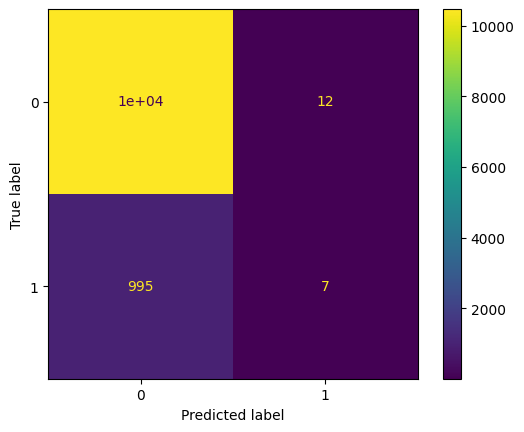

In [36]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=modelo.classes_)
visualizacion.plot()

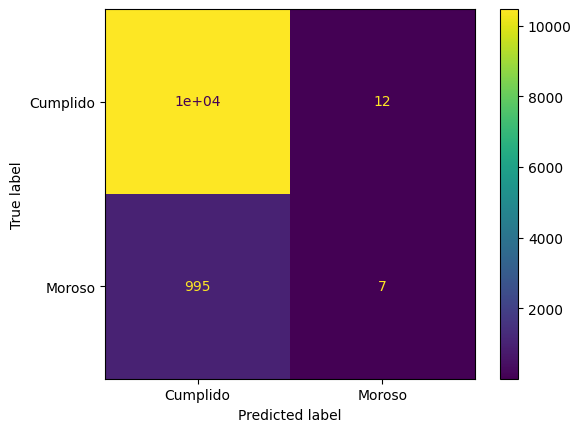

In [32]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Cumplido','Moroso'])
visualizacion.plot()

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(X_test, y_test)
print(f'Precisión de entrenamiento: {modelo.score(X_test, y_test)}')
print(f'Precisión de validación: {modelo.score(X_val, y_val)}')

Precisión de entrenamiento: 0.918558736426456
Precisión de validación: 0.9122898702203641


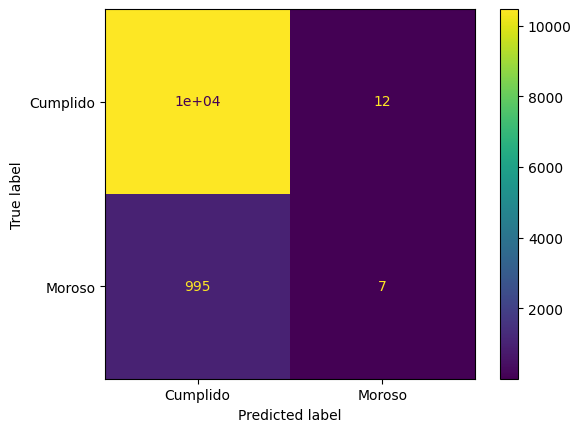

In [25]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
visualizacion = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion,
                                      display_labels = ['Cumplido', 'Moroso'])
visualizacion.plot();

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [26]:
45 / (45 + 123) #precision

0.26785714285714285

In [37]:
7 / (7 + 12)

0.3684210526315789

In [40]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [31]:
print(f'la precisión del modelo es: {precision_score(y_val, y_previsto)}')
print(f'la sensibilidad (Recall) del modelo es: {recall_score(y_val, y_previsto)}')
print(f'la exactitud (accuracy) del modelo es: {accuracy_score(y_val, y_previsto)}')

la precisión del modelo es: 0.3684210526315789
la sensibilidad (Recall) del modelo es: 0.006986027944111776
la exactitud (accuracy) del modelo es: 0.9122898702203641


In [43]:
print(f'el F1_score del modelo es: {f1_score(y_val, y_previsto)}')

el F1_score del modelo es: 0.013712047012732615


### Curva ROC

In [27]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [47]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay

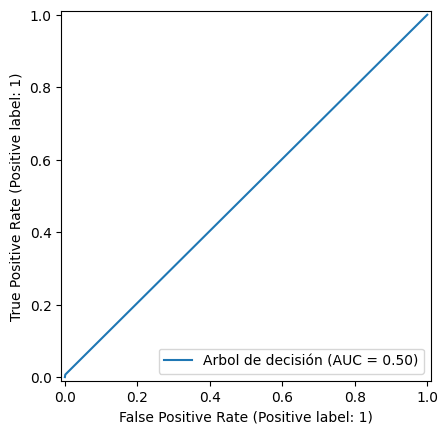

In [45]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Arbol de decisión')

In [46]:
print(f'El AUC del modelo es: {roc_auc_score(y_val, y_previsto)}')

El AUC del modelo es: 0.5029204402531896


### Curva de  precisión x sensibilidad

In [28]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


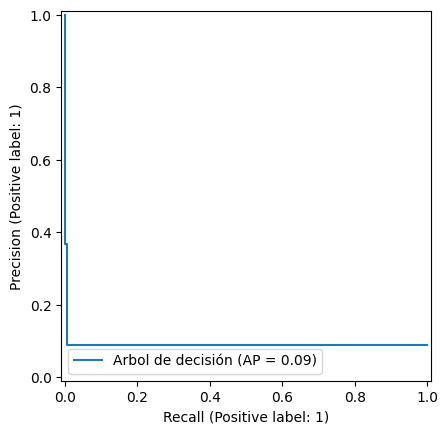

In [48]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Arbol de decisión')

In [49]:
from sklearn.metrics import average_precision_score

In [50]:
print(f' el score promedio de precisión vs recall es: {average_precision_score(y_val, y_previsto)}')

 el score promedio de precisión vs recall es: 0.08923872442701412


### Informe de métricas

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10479
           1       0.37      0.01      0.01      1002

    accuracy                           0.91     11481
   macro avg       0.64      0.50      0.48     11481
weighted avg       0.87      0.91      0.87     11481



## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [53]:
from sklearn.model_selection import KFold, cross_validate

In [57]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=10, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf)
cv_resultados

{'fit_time': array([0.271523  , 0.29073071, 0.27381659, 0.26845074, 0.28694272,
        0.27300072, 0.26549911, 0.27275991, 0.28953195, 0.26962137]),
 'score_time': array([0.0029099 , 0.00299954, 0.0030303 , 0.00301886, 0.0029974 ,
        0.00278091, 0.00289011, 0.0029068 , 0.00300694, 0.00288129]),
 'test_score': array([0.90899194, 0.91528746, 0.90831882, 0.90853659, 0.90135017,
        0.91245645, 0.91202091, 0.91441638, 0.90287456, 0.89634146])}

In [58]:
cv_resultados['test_score']

array([0.90899194, 0.91528746, 0.90831882, 0.90853659, 0.90135017,
       0.91245645, 0.91202091, 0.91441638, 0.90287456, 0.89634146])

In [59]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'la promedio de la exactitud del modelo es: {promedio}')
print(f'el desvio estandar de la exactitud del modelo es: {desvio_std}')
print(f'el intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

la promedio de la exactitud del modelo es: 0.9080594731719455
el desvio estandar de la exactitud del modelo es: 0.005814244571289902
el intervalo de confianza es: [0.8964309840293656,0.9196879623145253]


### Validación cruzada con sensibilidad

In [62]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'el intervalo de confianza del modelo es:  [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]'

In [60]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=10, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring='recall')
cv_resultados

{'fit_time': array([0.38183689, 0.42922068, 0.3911252 , 0.30012417, 0.28430152,
        0.27118158, 0.27374244, 0.27578163, 0.26877642, 0.27088547]),
 'score_time': array([0.0074501 , 0.00698304, 0.00820494, 0.00550079, 0.0050478 ,
        0.00635791, 0.00494504, 0.00816679, 0.00533772, 0.00488544]),
 'test_score': array([0.02570694, 0.02173913, 0.01736973, 0.02222222, 0.01405152,
        0.01295337, 0.01538462, 0.02925532, 0.02163462, 0.02672606])}

In [63]:
intervalo_confianza(cv_resultados)

'el intervalo de confianza del modelo es:  [0.01007602775394016,0.031332675951400685]'

In [67]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=10, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring=['recall', 'accuracy', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.30754471, 0.39309239, 0.37203479, 0.36896324, 0.38488841,
        0.37754107, 0.3312788 , 0.27812982, 0.26984453, 0.26666808]),
 'score_time': array([0.02802658, 0.01681399, 0.01635599, 0.01596045, 0.01685071,
        0.02440381, 0.01106596, 0.01199484, 0.01203275, 0.01135278]),
 'test_recall': array([0.03084833, 0.02173913, 0.01488834, 0.01975309, 0.01405152,
        0.01036269, 0.01538462, 0.02659574, 0.02403846, 0.02672606]),
 'test_accuracy': array([0.90986283, 0.91441638, 0.90722997, 0.90810105, 0.9011324 ,
        0.91180314, 0.91114983, 0.91419861, 0.90265679, 0.89699477]),
 'test_precision': array([0.24489796, 0.19512195, 0.17142857, 0.24242424, 0.15384615,
        0.14814815, 0.2       , 0.26315789, 0.19607843, 0.25      ]),
 'test_f1': array([0.05479452, 0.0391198 , 0.02739726, 0.03652968, 0.02575107,
        0.01937046, 0.02857143, 0.04830918, 0.04282655, 0.04828974])}

In [68]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')

In [69]:
informe_metricas(cv_resultados)

Intervalo de confianza(test_accuracy): [0.8967223041124394, 0.9187868482031204]
Intervalo de confianza(test_recall): [0.007796137781157796, 0.03308145810514421]
Intervalo de confianza(test_precision): [0.12763065280976052, 0.285390017662178]
Intervalo de confianza(test_f1): [0.015085385614962338, 0.059106553746336124]


### Estratificando los datos

In [70]:
datos['moroso'].value_counts()

,count
moroso,
0,49309
1,4716


In [71]:
from sklearn.model_selection import StratifiedKFold

In [72]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=skf, scoring='recall')
cv_resultados

{'fit_time': array([0.39197087, 0.37609792, 0.40428543, 0.33060074, 0.27692795,
        0.26549196, 0.27898097, 0.26816726, 0.26501846, 0.26485753]),
 'score_time': array([0.00751066, 0.00747323, 0.00799966, 0.00606489, 0.00513005,
        0.00493526, 0.00497603, 0.00495148, 0.0048759 , 0.00769424]),
 'test_score': array([0.02743142, 0.0325    , 0.01995012, 0.02244389, 0.03491272,
        0.02244389, 0.01995012, 0.01995012, 0.01995012, 0.02244389])}

In [73]:
intervalo_confianza(cv_resultados)

'el intervalo de confianza del modelo es:  [0.013698261712415916,0.03469700013297062]'

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [74]:
from imblearn.over_sampling import SMOTE

In [76]:
oversampling = SMOTE()
x_balanceado, y_balanceado = oversampling.fit_resample(X, y)
y_balanceado.value_counts(normalize=True)

,proportion
moroso,
0,0.5
1,0.5


In [77]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring='recall')
cv_resultados

{'fit_time': array([0.59051323, 0.59372687, 0.58984542, 0.60621715, 0.58695722,
        0.59914136, 0.59889698, 0.58480835, 0.60522008, 0.58559799]),
 'score_time': array([0.00606537, 0.00591803, 0.00643635, 0.00589466, 0.00608087,
        0.00603628, 0.0058074 , 0.00588226, 0.00602722, 0.00951433]),
 'test_score': array([0.74206633, 0.71939871, 0.70992366, 0.70539122, 0.72035314,
        0.70293486, 0.73013601, 0.74278215, 0.7081842 , 0.7372942 ])}

In [78]:
intervalo_confianza(cv_resultados)

'el intervalo de confianza del modelo es:  [0.6927263460899287,0.7509665522691502]'

### Pipeline para validación

In [79]:
from imblearn.pipeline import Pipeline as imbpipeline

In [80]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arbol', modelo)])

In [81]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')
cv_resultados

{'fit_time': array([0.55719662, 0.57909155, 0.56555462, 0.57212973, 0.5602324 ]),
 'score_time': array([0.00690365, 0.00802803, 0.00672388, 0.00668859, 0.00705624]),
 'test_score': array([0.27680798, 0.27465668, 0.27805486, 0.27306733, 0.20822943])}

In [82]:
intervalo_confianza(cv_resultados)

'el intervalo de confianza del modelo es:  [0.20811991364250682,0.3162065984169201]'

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [83]:
from imblearn.under_sampling import NearMiss

In [84]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arbol', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')
cv_resultados

{'fit_time': array([0.21495414, 0.20873356, 0.20521498, 0.21357656, 0.23421526]),
 'score_time': array([0.0068922 , 0.00667691, 0.00670481, 0.0065403 , 0.00948477]),
 'test_score': array([0.68204489, 0.6267166 , 0.67331671, 0.67082294, 0.65710723])}

In [85]:
intervalo_confianza(cv_resultados)

'el intervalo de confianza del modelo es:  [0.6232556619078129,0.7007476880194912]'

### Probando el modelo

In [86]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



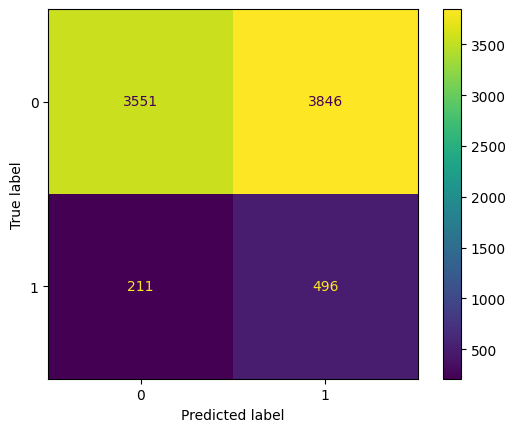

In [89]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto)

In [90]:
from imblearn.combine import SMOTEENN

In [91]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arbol', modelo)])

In [94]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring = 'recall')
intervalo_confianza(cv_resultados)

'el intervalo de confianza del modelo es:  [0.3197142090836299,0.4311178244405497]'